## Gender Gap in College Degrees

[The Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv)


Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

For the purpose of this project, we will create various visualizations to explore this dataset.

In [2]:
#loading the required packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [4]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [5]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

## Comparing STEM Majors

First, we want to create visualization to compare the gender gap in STEM Majors. 
The STEM majors are: 
- Engineering
- Computer Science
- Psychology
- Biology
- Physical Sciences
- Math and Statistics

In [6]:
cb_dark_blue = (0/255,107/255,164/255) #RGB Color codes
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

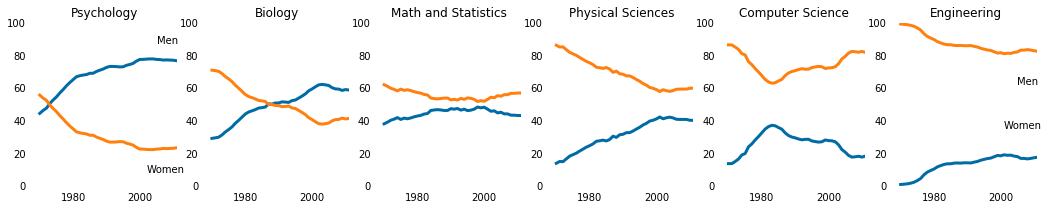

In [13]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
#if we use legend, it would cover a part of the line chart. 
#Instead, we use text to have a clearer chart
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

plt.savefig('stem_degrees.png')        
plt.show()


As shown in the charts above, the huge gender gap is in the Engineer majors. It shows that the percentage of men graduates in Engineering major is much higher than women.On the other hand, there is a small gender gap in Math and Statistics Majors. 

' One interesting fact is that in 1980s there were more women graduting Computer Science major than 2010s.

## Comparing across all degree categories

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:

In [8]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

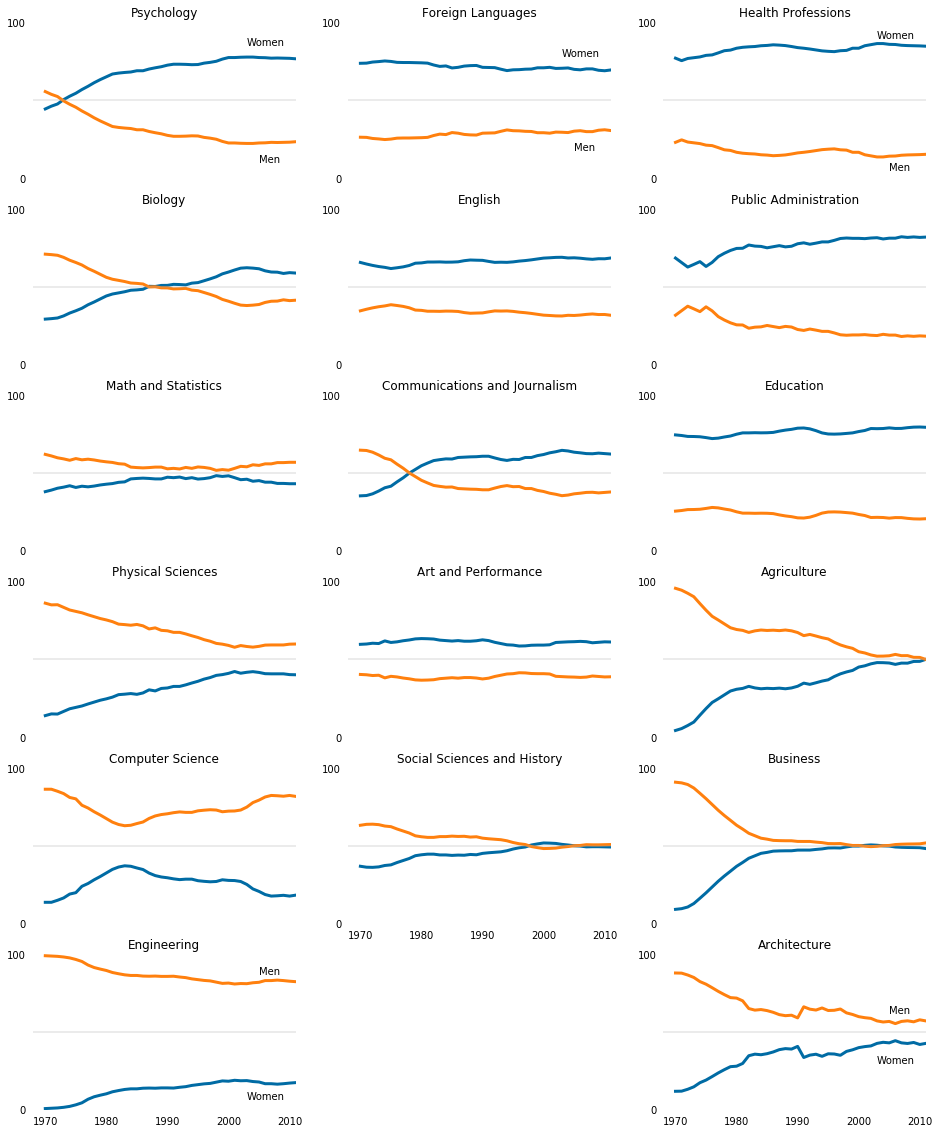

In [11]:
fig = plt.figure(figsize = (16, 20))


## Generate first column of line charts. STEM degrees.
for sp in range(0, 18, 3):
    cat_index = int(sp/3) #this variable is initiated to define the values in the stem major array
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]],c = cb_dark_blue, label = 'Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c = cb_orange, label ='Men', linewidth = 3)
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.set_yticks([0, 100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = .3) #horizantal line in the middle
    ax.tick_params(bottom="off",
                   top="off",
                   left="off",
                   right="off",
                  labelbottom = 'off')
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom = 'on')
        
        ## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.set_yticks([0, 100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = .3) #horizantal line in the middle
    ax.tick_params(bottom="off",
                   top = "off",
                   left = "off",
                   right = "off",
                  labelbottom = 'off')
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')
        

## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.set_yticks([0, 100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = .3) #horizantal line in the middle
    ax.tick_params(bottom = "off",
                   top = "off",
                   left = "off",
                   right = "off",
                  labelbottom = 'off')
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom = 'on')

#exporting the png file
plt.savefig('college_degrees.png')
plt.show()

As shown the graphs above, the largest gaps between the genders in different majors in 2000s, are among the Health Professionals, Public Administrations, Education, Computer Science and Engineering.